In [1]:
!pip install opencv-python


In [2]:
!pip install easyocr
!pip install imutils

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



# READING THE IMG & GRAYSCALE 

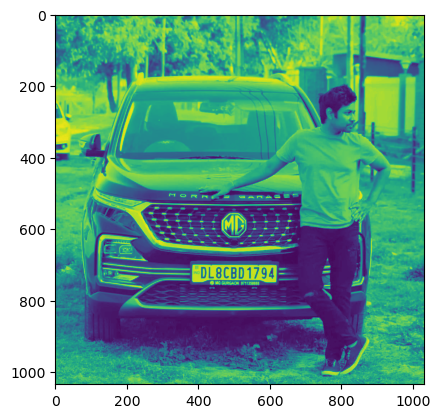

In [4]:
#read the image and then convert it to gray scale and by using matplotlib visualise it
#using greaysacle eleminate complexity
read_img = cv2.imread("C:/Users/sachi/OneDrive/Pictures/Rolls and Car/Mr stark.jpeg")
gray_scale = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)
plt.imshow((gray_scale))


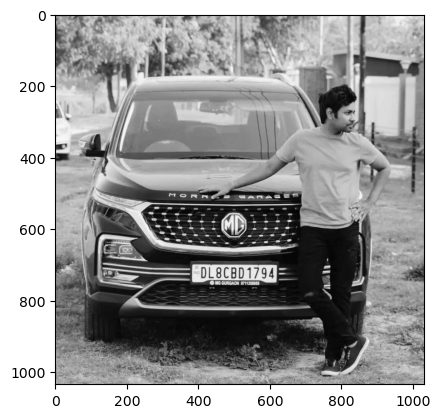

In [5]:
plt.imshow(cv2.cvtColor(gray_scale, cv2.COLOR_BGR2RGB))

# FILTERING & EDGE DETECTION

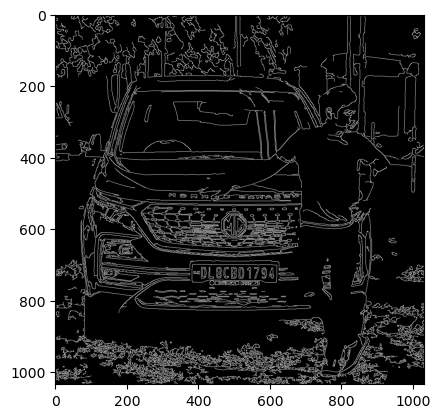

In [6]:
# in filtering part we remove noise from the image
# edge detection works like croping the image, it searches for corners (edges)
#for noise reduction: bilateralfilter
#for edge detection: Canny algo

bfilter = cv2.bilateralFilter(gray_scale, 10, 15, 15) 
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# CONTOUR & MASKING 

In [7]:
import imutils
import easyocr

In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[383, 701]],

       [[384, 749]],

       [[618, 748]],

       [[618, 701]]], dtype=int32)

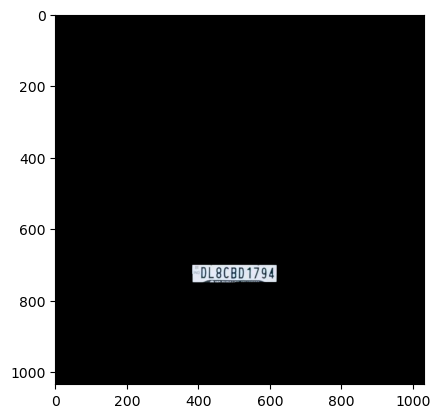

In [10]:
mask = np.zeros(gray_scale.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(read_img, read_img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_scale[x1:x2+1, y1:y2+1]


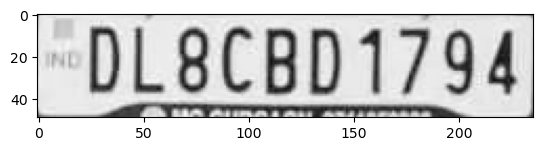

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# EASY OCR

In [14]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[16, 0], [236, 0], [236, 46], [16, 46]], 'LBCBD 1794', 0.5593461716590887)]

# FINAL OUTCOME

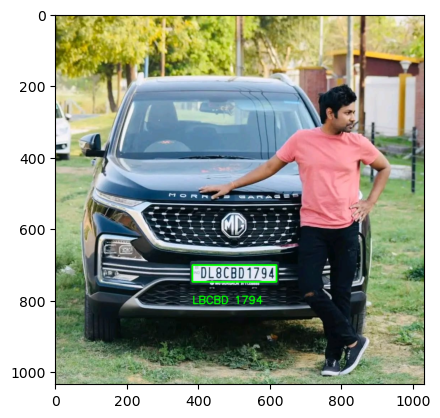

In [16]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(read_img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(read_img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))